<a href="https://colab.research.google.com/github/natkins14/FastF1-F1-Data-Analytics/blob/main/Driver_Lap_Times_Distribution_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fastf1

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
from fastf1 import plotting
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,color_scheme='fastf1')

Example plot: 2023 Azerbaijan Grand Prix Lap Time Distribution

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. 

['11', '1', '16', '14', '55', '44', '18', '63', '4', '22']
['PER', 'VER', 'LEC', 'ALO', 'SAI', 'HAM', 'STR', 'RUS', 'NOR', 'TSU']


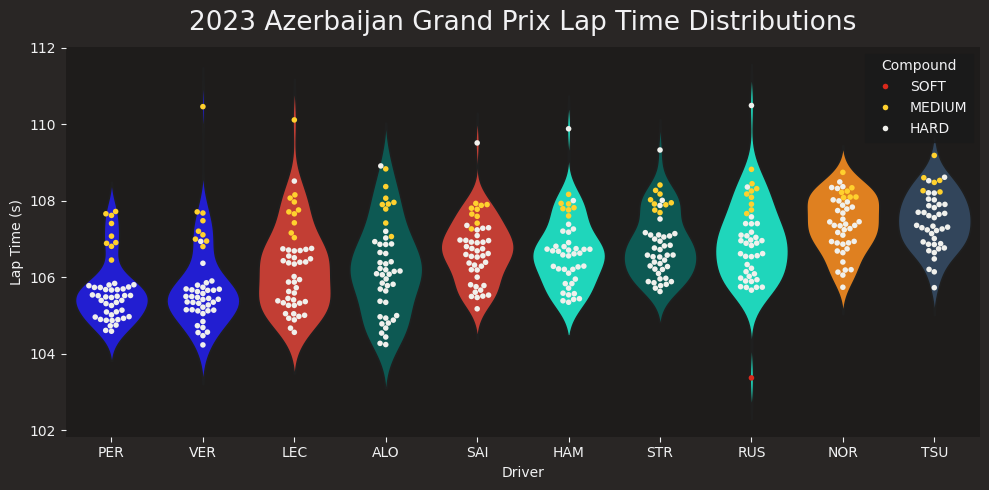

In [ ]:
race = fastf1.get_session(2023, 'Azerbaijan', 'R')
race.load()

#get all the laps for the point finishers only. Filter out slow laps since they distort the graph axis

point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

# plot the drivers by finishing order, and get their three letter abbreviations in the following order.

finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

# create violin plots to show the distributions and swarm plots for the actual lap times

fig, ax = plt.subplots(figsize=(10, 5))
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=race))

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=race),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

#make the plot more aesthetic

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
ax.set_title("2023 Azerbaijan Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


Analysis:


*   Perez and Verstappen had the smallest distribution of lap times on the hard tires, both of them with lap times in the 64/65 second mark.
*   Alonso had the greatest variability amongst the point scores, with hard tire lap times ranging from 64 seconds to 67 seconds, a 3 second differential.
- Hard and Medium Tires were the compounds primarily used in the race.

